In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [44]:
# Load the dataset
data = pd.read_csv("diabetes.csv")
# Display the first few rows of the dataset
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [45]:
# Preprocess the dataset
# No need for major preprocessing as the dataset is clean, but you can add steps like handling
# Separate features (X) and target labels (y)
X = data.drop('Outcome', axis=1)

y = data['Outcome']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
classifier.fit(X_train, y_train)
# Predict on the testing data
y_pred = classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ")
print(accuracy)
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print confusion matrix
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

Accuracy: 
0.7207792207792207
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Confusion Matrix:
[[77 22]
 [21 34]]


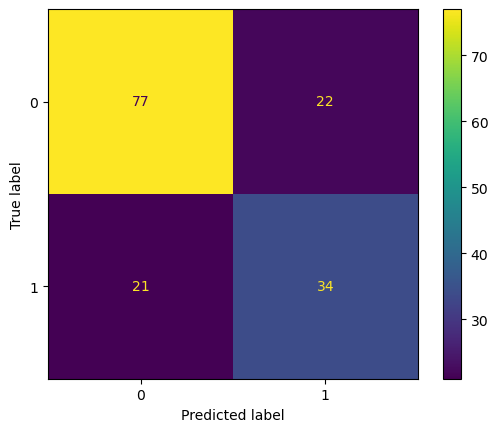

In [47]:
matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
matrix.plot()
plt.show()

In [49]:

# Function to classify new data
def classify_patient(data):
    data_df = pd.DataFrame([data], columns=X.columns)
    prediction = classifier.predict(data_df)
    return 'Diabetic' if prediction[0] == 1 else 'Non-Diabetic'
# Example usage: classify a new patient
new_patient = {
    'Pregnancies': 4,
    'Glucose': 50,
    'BloodPressure': 100,
    'SkinThickness': 10,
    'Insulin': 90,
    'BMI': 25.5,
    'DiabetesPedigreeFunction': 0.5,
    'Age': 20
}
print(f"New patient classification: {classify_patient(new_patient)}")


New patient classification: Non-Diabetic
